#Loading data 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [148]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB,CategoricalNB, MultinomialNB


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/VI semester/ML/datasets/GOT_character-predictions.csv")

In [4]:
dataset.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [7]:
dataset  = dataset.drop(columns=["S.No",'actual','pred','alive','plod'])

In [8]:
dataset.head()

,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [10]:
len(dataset)

1946

In [9]:
dataset.isnull().sum()

name                    0
title                1008
male                    0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64

Attributes [Mother, Father, Spouse, Heir, is_X_alive] will be removed as the values are null for over 1900 rows out of 1946

In [11]:
dataset  = dataset.drop(columns=["father",'mother','spouse','heir','isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse'])

In [42]:
number_features = len(x.columns)
number_classes = len(np.unique(Y))
print(number_features)
print(number_classes)

19
2


#Handling null values


In [16]:
from sklearn.impute import SimpleImputer

In [53]:
imputer = SimpleImputer(strategy='most_frequent')

In [54]:
result_imp = imputer.fit_transform(dataset)

In [58]:
dataset = pd.DataFrame(result_imp, columns = dataset.columns)

In [59]:
dataset.isnull().sum()

name                 0
title                0
male                 0
culture              0
dateOfBirth          0
DateoFdeath          0
house                0
book1                0
book2                0
book3                0
book4                0
book5                0
isMarried            0
isNoble              0
age                  0
numDeadRelations     0
boolDeadRelations    0
isPopular            0
popularity           0
isAlive              0
dtype: int64

In [60]:
x = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

#Translating words into numbers with LabelEncoder

In [87]:
from sklearn.preprocessing import LabelEncoder

In [93]:
le = LabelEncoder()
x_name = le.fit_transform(x['name'])
x_culture = le.fit_transform(x['culture'])
x_title = le.fit_transform(x['title'])
x_house = le.fit_transform(x['house'])

In [98]:
x['name'], x['culture'], x['title'], x['house'] = x_name, x_culture, x_title, x_house

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#Visualization of the data

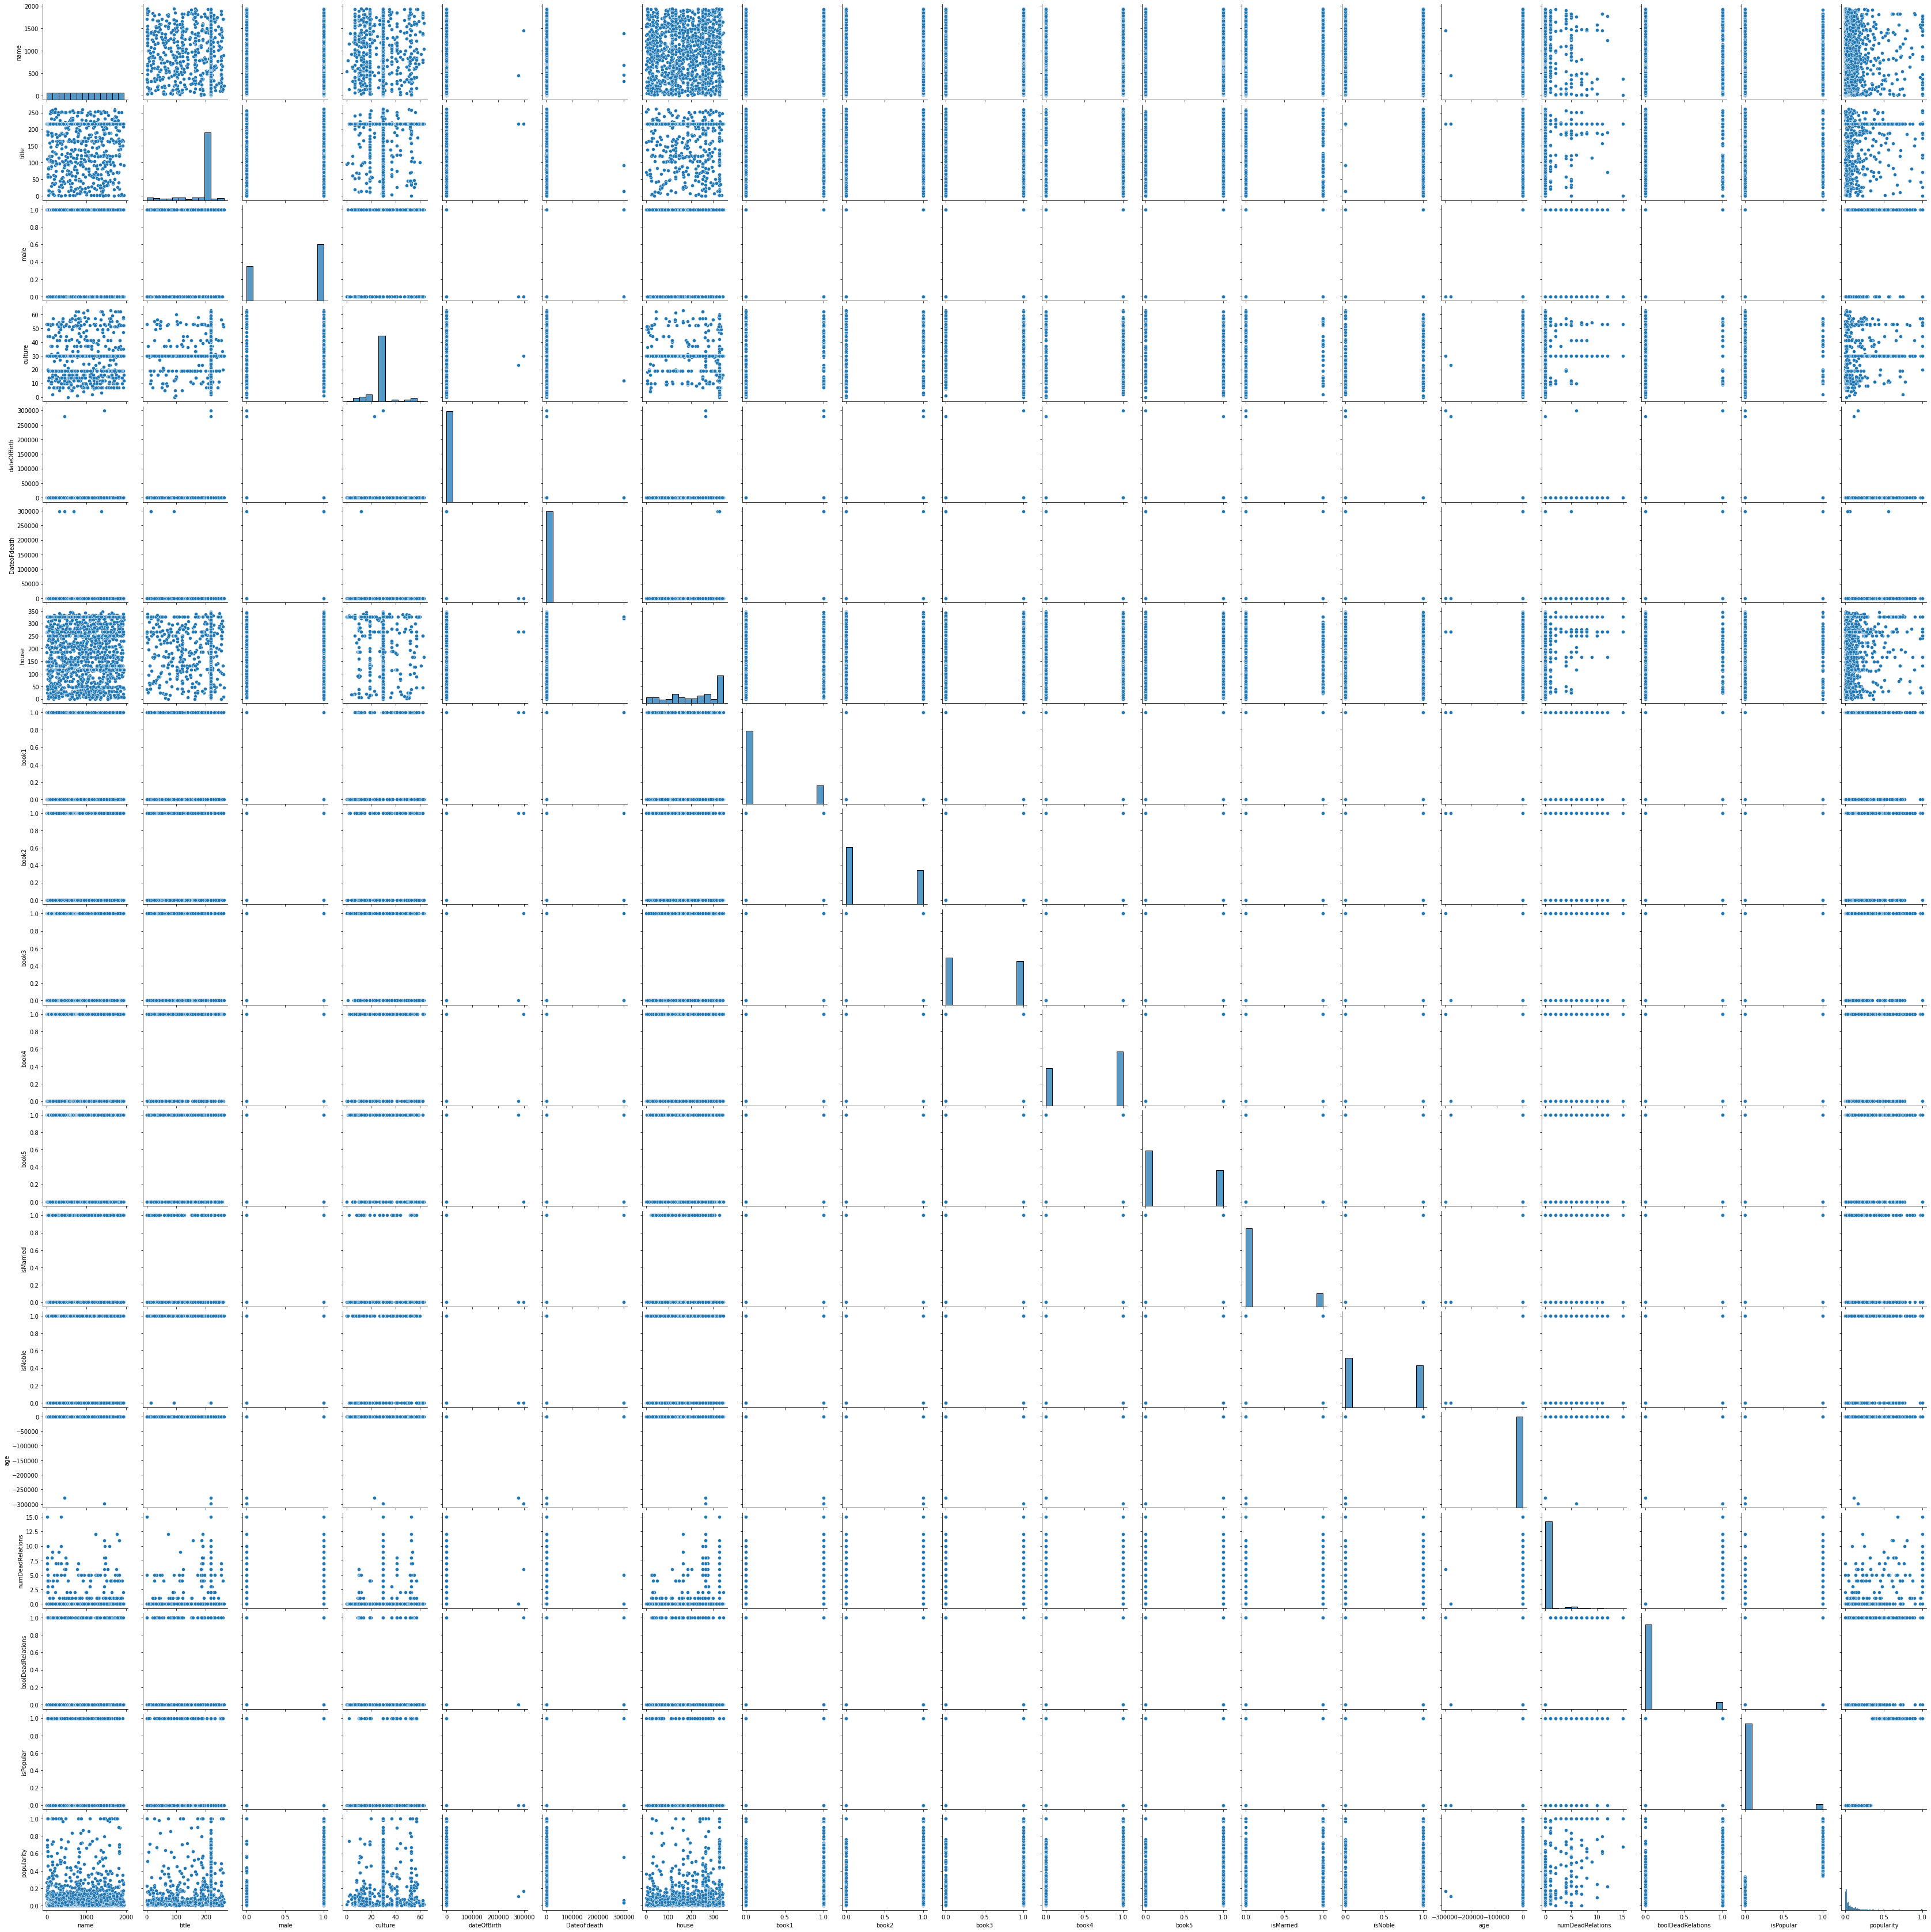

In [101]:
sns.pairplot(x) 

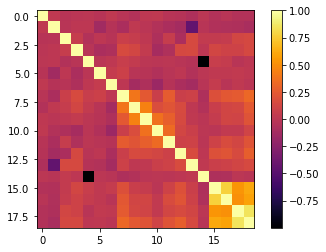

In [104]:
correlation_matrix = np.zeros((number_features,number_features))
for i in range(number_features): 
    measure = x.iloc[:,i]
    for j in range(number_features):
        measure2 = x.iloc[:,j]
        corr, _ = stats.pearsonr(measure, measure2)
        correlation_matrix[i][j] = corr
plt.figure()
plt.imshow(correlation_matrix, cmap = "inferno")
plt.colorbar()
plt.show()

#Classification

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.25) 


Classification with LDA

In [108]:
lda = LinearDiscriminantAnalysis()

In [114]:
y_train = y_train.astype('int')
lda.fit(X_train, y_train)
pred = lda.predict(X_test)

accuracy = np.round(np.sum(y_test == pred)/len(y_test))
print(f"Accuracy of the LDA model: {accuracy}")

Accuracy of the LDA model: 1.0


In [140]:
x.head()

,name,title,male,culture,dateOfBirth,DateoFdeath,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity
0,1827,217,1,30,286.0,299.0,327,0,0,0,0,0,0,0,100.0,11,1,1,0.605351
1,1841,151,1,41,208.0,299.0,116,1,1,1,1,1,1,1,97.0,1,1,1,0.896321
2,6,217,1,30,286.0,299.0,264,0,0,0,1,0,0,1,100.0,0,0,0,0.267559
3,21,194,0,30,82.0,105.0,23,0,0,0,0,0,1,1,23.0,0,0,0,0.183946
4,1667,68,0,10,276.0,299.0,237,0,0,0,1,0,1,1,29.0,0,0,0,0.043478


Classification with NaiveBayes.
There are 3 types of NaiveBayes in scikit library and deciding which one to use depends on the data type. But our data is mixed - it has categorical, binary  and continuous features.
The solution is weighted product of three classifiers. 
And this is the reason why GaussianNB gives accuracy of 0.84 opposed of LDA (accuracy=1.0)

In [147]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("Naive Bayes accuracy:", accuracy)

Naive Bayes accuracy: 0.844


Classification with QuadraticDiscriminantAnalysis.

In [150]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
pred = qda.predict(X_test)

accuracy = np.round(np.sum(y_test == pred)/len(y_test))
print(f"QDA accuracy: {accuracy}")

QDA accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


 LDA produce linear decision boundaries so when the true decision boundaries are linear, then the LDA approaches will perform well. QDA, on the other-hand, provides a non-linear quadratic decision boundary. Thus, when the decision boundary is moderately non-linear, QDA may give better results.
 
 This implies our decision boundary is not linear!